<a href="https://colab.research.google.com/github/Ashi743/my_projects-/blob/main/cement_EDA_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES AND  DATA CLEANING AND PREPROCESSING**

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


In [8]:
df= pd.read_csv("/content/concrete_data (3).csv")

In [9]:
df.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [84]:
df["water-cement ratio"]= df["water"]/df["cement"]

In [10]:
from ydata_profiling import ProfileReport
prof= ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
prof

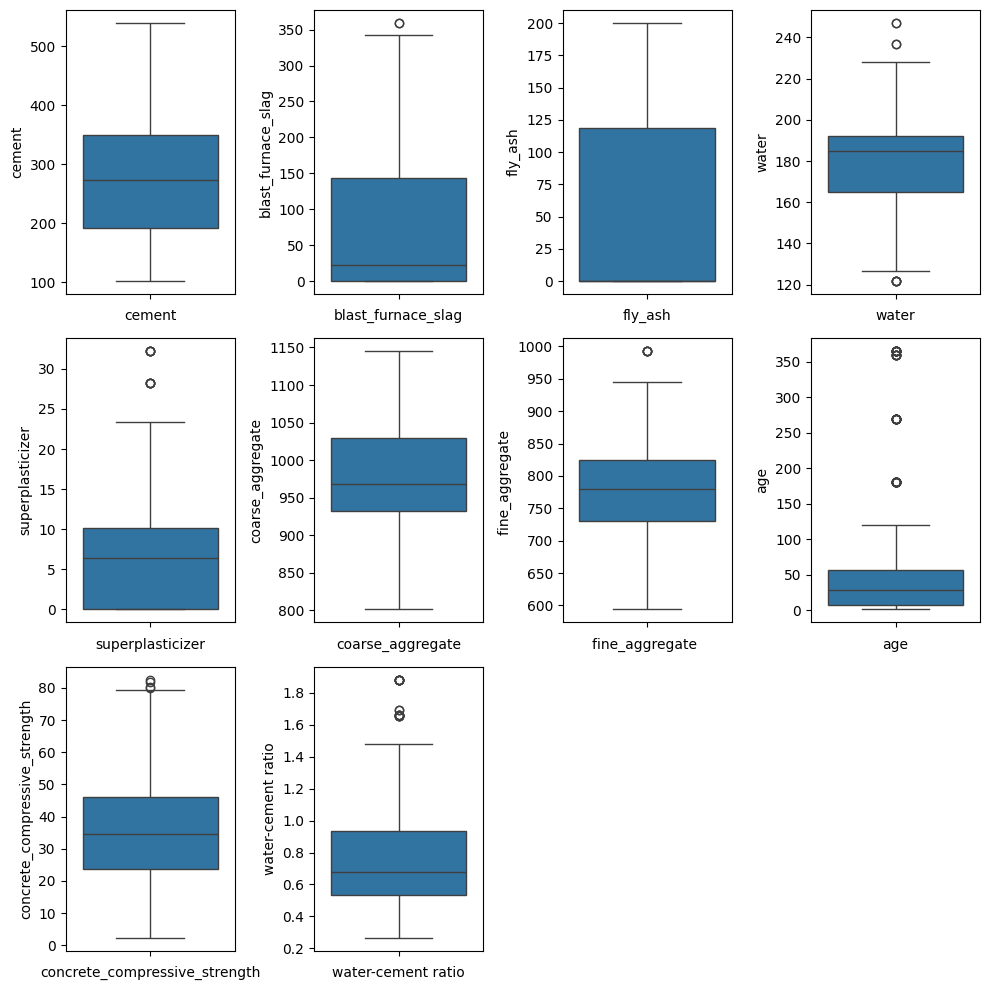

In [88]:
#OUTLIERS
columns= df.columns
plt.figure(figsize=(10,10))
plotnumber= 1
for col in range(len(columns)):
  if plotnumber<=10:
    ax= plt.subplot(3,4,plotnumber)
    sns.boxplot(df[columns[col]])
    plt.xlabel(columns[col])
  plotnumber+=1
plt.tight_layout()

In [89]:
#DISTRIBUTION OF GRAPHS
from scipy.stats import skew

def plot_hist(df):
    n_cols = 3  # Keep the same number of columns
    n_rows = math.ceil(len(df.columns) / n_cols)  # Adjust the number of rows

    # Create the subplots with adjusted number of rows
    fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(10, 10))
    ax = ax.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(data=df, x=col, ax=ax[i], kde=True)
        skewness = skew(df[col].dropna())  # Calculate skewness
        ax[i].set_title(f'{col} (Skewness: {skewness:.2f})')  # Add skewness to title

    for i in range(len(df.columns), len(ax)):
        fig.delaxes(ax[i])

    plt.tight_layout()
    plt.show()

In [90]:
import math

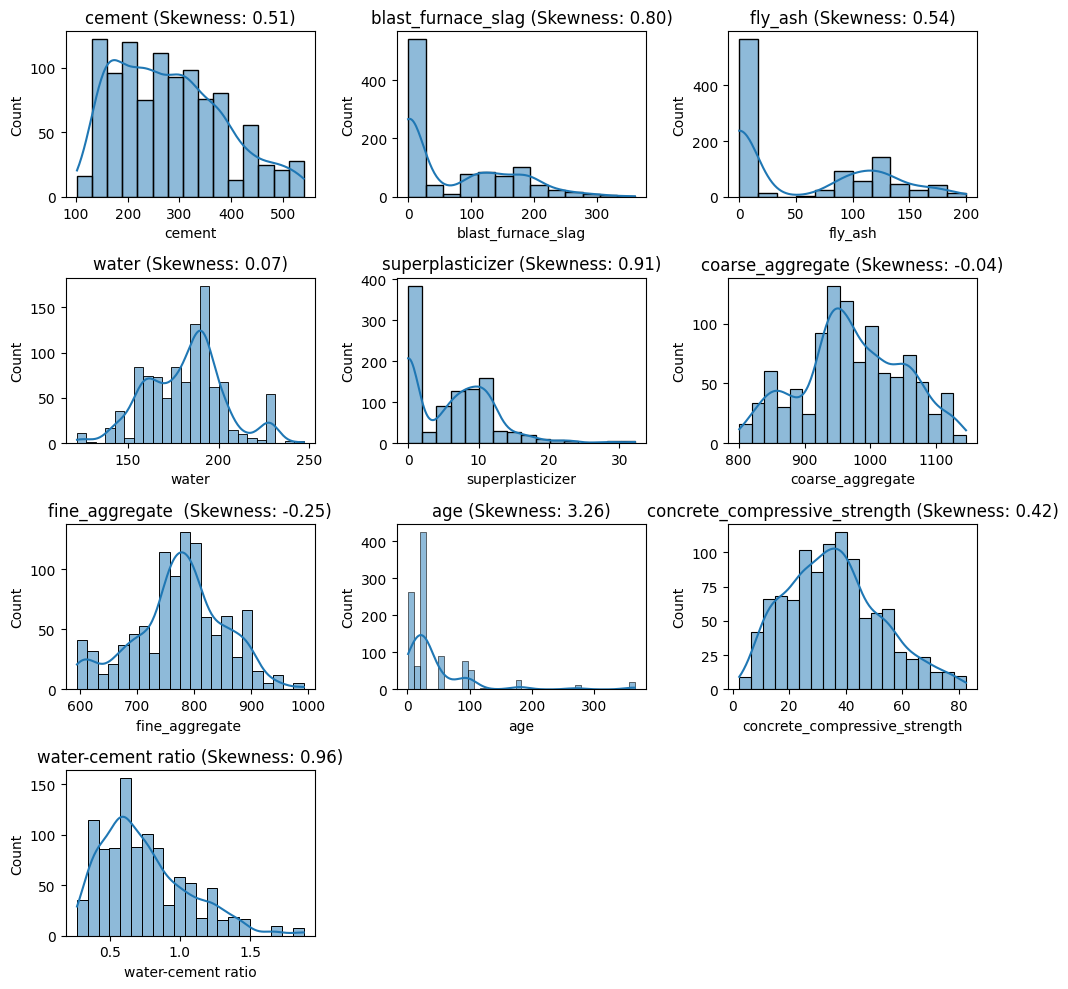

In [91]:
plot_hist(df)

data seems to  be skewed in "age" ,"superplaster", "cement", "ggbfs", "fly ash"

EXPLORATORY DATA ANALYSIS- 1

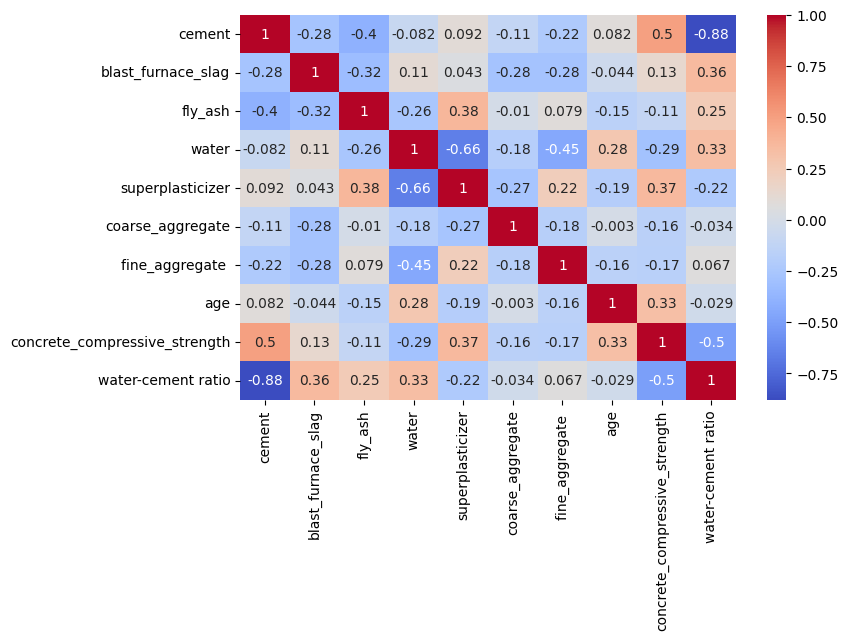

In [92]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True , cmap='coolwarm')
plt.show()

In [93]:
import math

def plot_regression_with_corr(df, target_column, n_cols=3, figsize=(15, 10)):
    """
    Plots scatter plots with regression lines and Pearson correlation coefficients for each feature
    in a DataFrame against a specified target variable.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target column.
        n_cols (int): Number of columns in the subplot grid (default is 3).
        figsize (tuple): Size of the entire figure (default is (15, 10)).
    """
    # Number of rows needed based on columns
    n_rows = math.ceil(len(df.columns) / n_cols)

    # Create subplots
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
    ax = ax.flatten()

    # Loop through columns
    for i, col in enumerate(df.columns):
        if col != target_column:  # Skip the target column itself
            # Calculate Pearson correlation
            corr = df[col].corr(df[target_column])

            # Plot scatter plot with regression line
            sns.regplot(data=df, x=col, y=target_column, ax=ax[i])

            # Set title and labels
            ax[i].set_title(f'{col} vs {target_column}\nCorr: {corr:.2f}')
            ax[i].set_xlabel(col)
            ax[i].set_ylabel(target_column)

    # Hide unused axes
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    # Adjust layout for better appearance
    plt.tight_layout()
    plt.show()


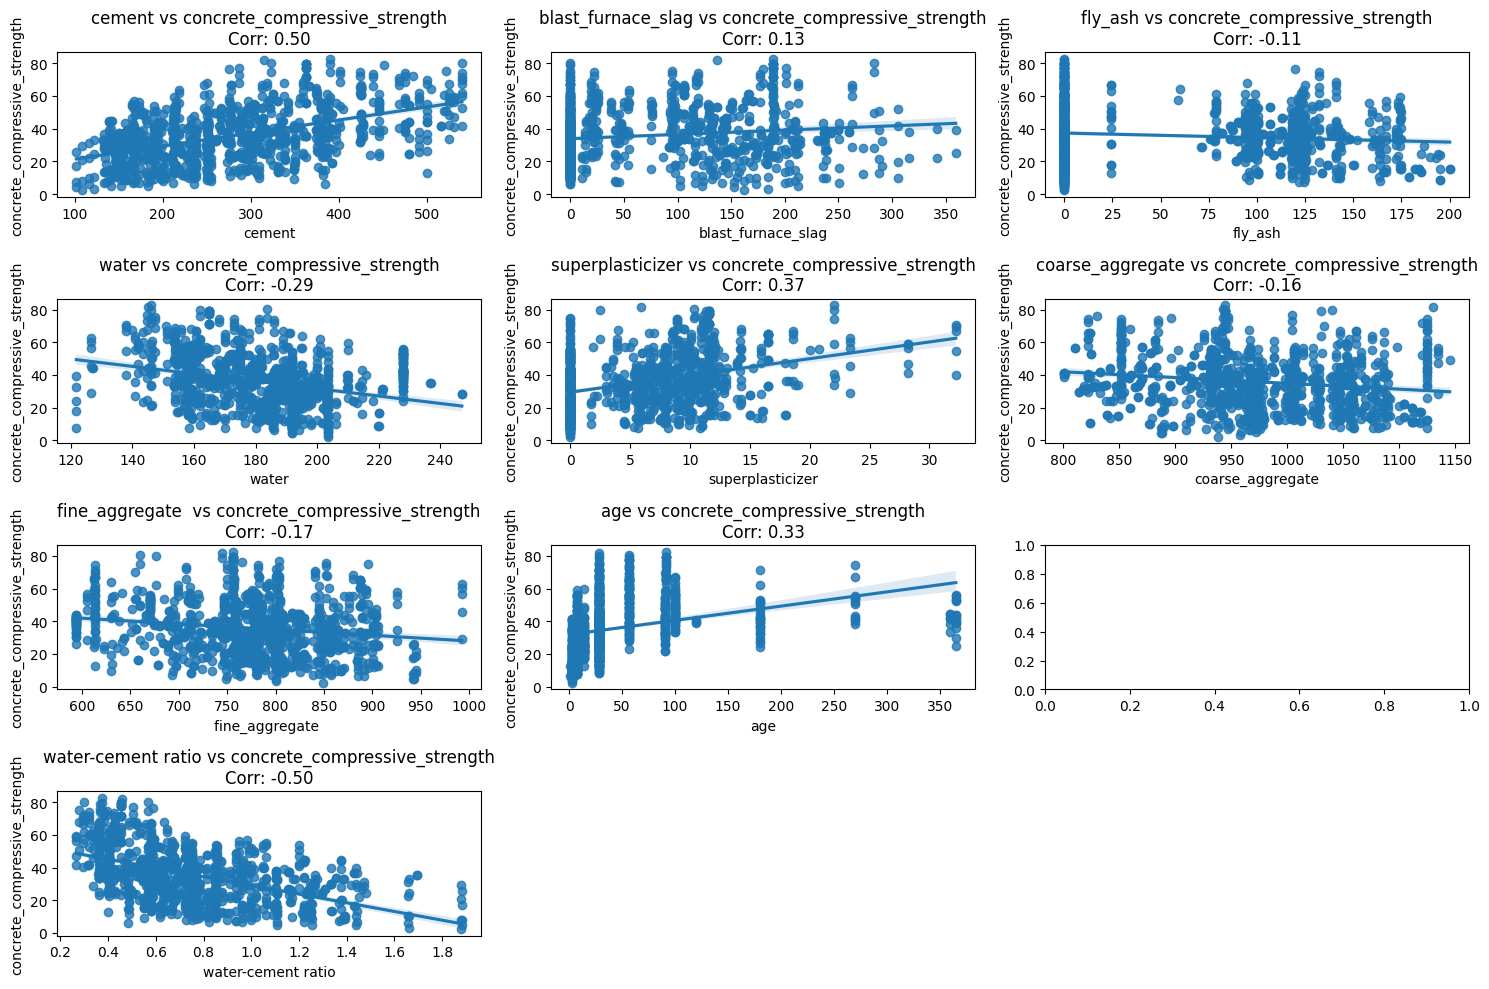

In [94]:
plot_regression_with_corr(df= df ,target_column ="concrete_compressive_strength" )

from correlation matrix and pandas profilling insighs were:

1. age is highly overall correlated with concrete_compressive_strength
2.  concrete_compressive_strength is highly overall correlated with age	High correlation

3.  superplasticizer is highly overall inversely correlated with water

4.  fine aggregate inversely correlated with water

5.  strength is inversely correlated with water

In [95]:
# FOR OUTLIERS AND SKEWNESS    which to do first
# lets go outlier remove and check plots if there is any change in skewness
def outlier(df):
  for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df1=df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]
  return df1

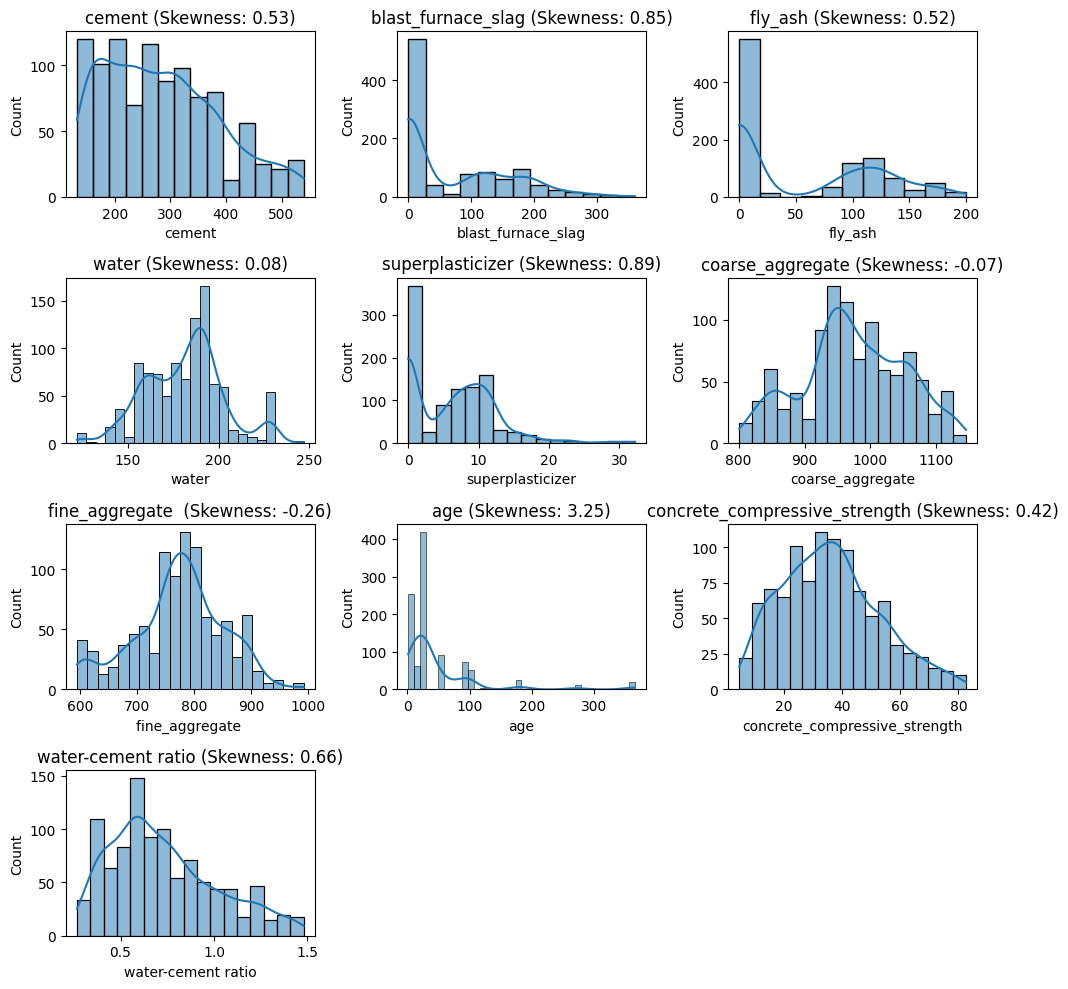

In [96]:
df_outlier_removed =outlier(df)
plot_hist(df_outlier_removed)

 The skewness not affected means no as such outliers and its natural distribution of dataset being skewed.

In [97]:
def boxplot(df):
  fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(8,8))
  ax = ax.flatten()
  for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=ax[i])
    plt.xlabel(col)
    plt.tight_layout()
  plt.show()

In [98]:
df_outlier_removed.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  \
0            1040.0            676.0   28                          79.99   
1            1055.0            676.0   28                          61.89   
2             932.0            594.0  270                          40.27   
3             932.0            594.0  365                          41.05   
4             978.4            825.5  360                          44.30   

   water-cement ratio  
0            0.300000  
1            0.300000  
2            0.685714  
3            0.685714  
4            0.966767

In [99]:
#DATA NORMALIZATION
#using Yeo-johnson
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method='yeo-johnson')
df_yeo_johnson= pd.DataFrame(pt.fit_transform(df_outlier_removed), columns=df_outlier_removed.columns)
df_yeo_johnson.head()

cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
0  1.971788           -1.041926 -0.913606 -0.899519         -0.361248   
1  1.971788           -1.041926 -0.913606 -0.899519         -0.361248   
2  0.599075            1.021212 -0.913606  2.154066         -1.244488   
3  0.599075            1.021212 -0.913606  2.154066         -1.244488   
4 -0.800076            0.990965 -0.913606  0.516476         -1.244488   

   coarse_aggregate  fine_aggregate        age  concrete_compressive_strength  \
0          0.845781        -1.203027  0.106398                       2.226444   
1          1.042272        -1.203027  0.106398                       1.438754   
2         -0.545992        -2.083571  2.126931                       0.344349   
3         -0.545992        -2.083571  2.399193                       0.387874   
4          0.046923         0.651941  2.386728                       0.565368   

   water-cement ratio  
0           -1.938946  
1           -1.938946  
2            0.006797  
3            0.006797  
4            0.919243

In [100]:
#WATER- CEMENT RATIO
#df_yeo_johnson['water_cement_ratio']= df_yeo_johnson['water']/df_yeo_johnson['cement']


<Axes: >

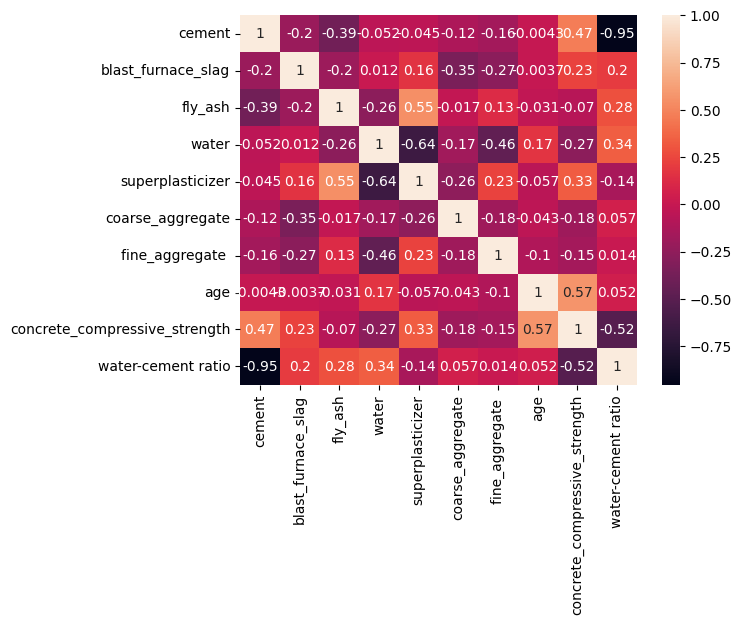

In [101]:
sns.heatmap(df_yeo_johnson.corr(), annot=True)

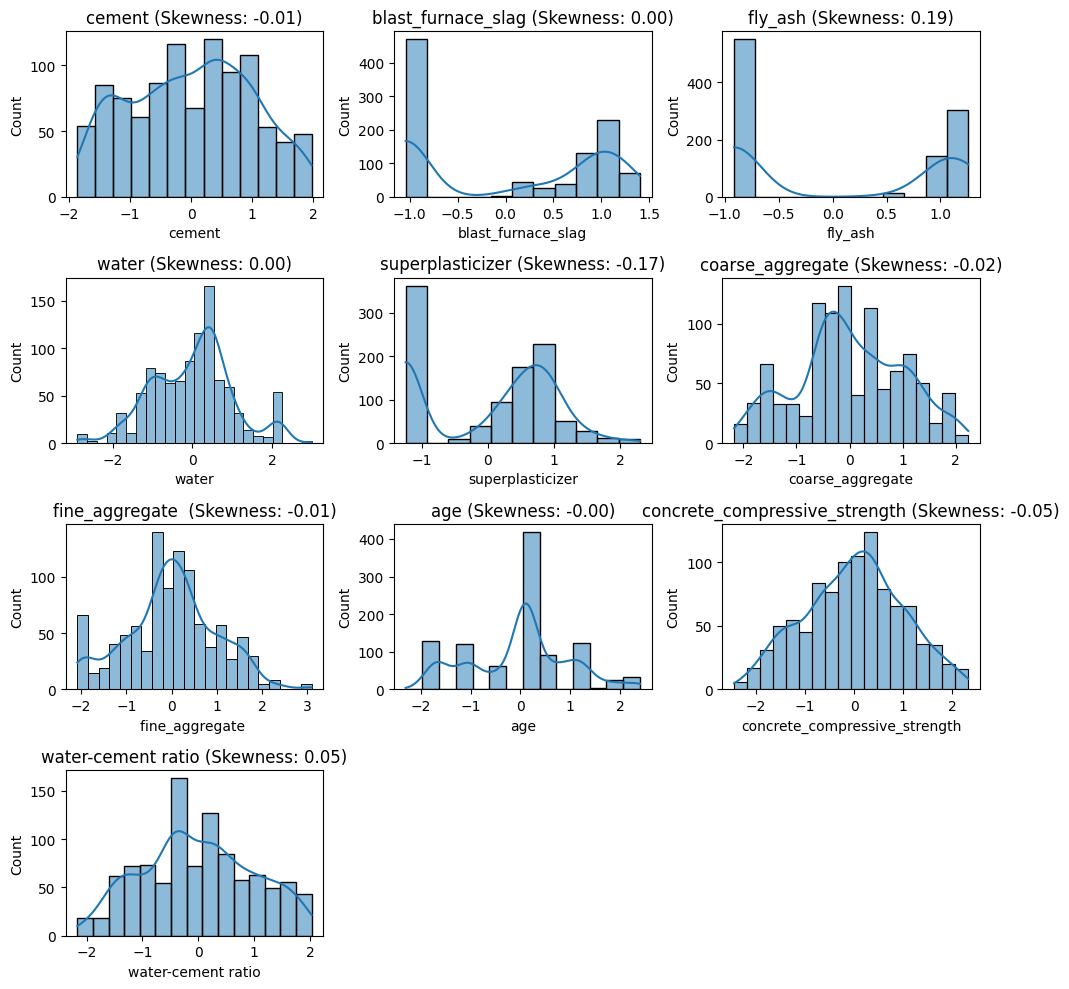

In [102]:
plot_hist(df_yeo_johnson)

Yeo- johnson removed skewness and outlier consistently

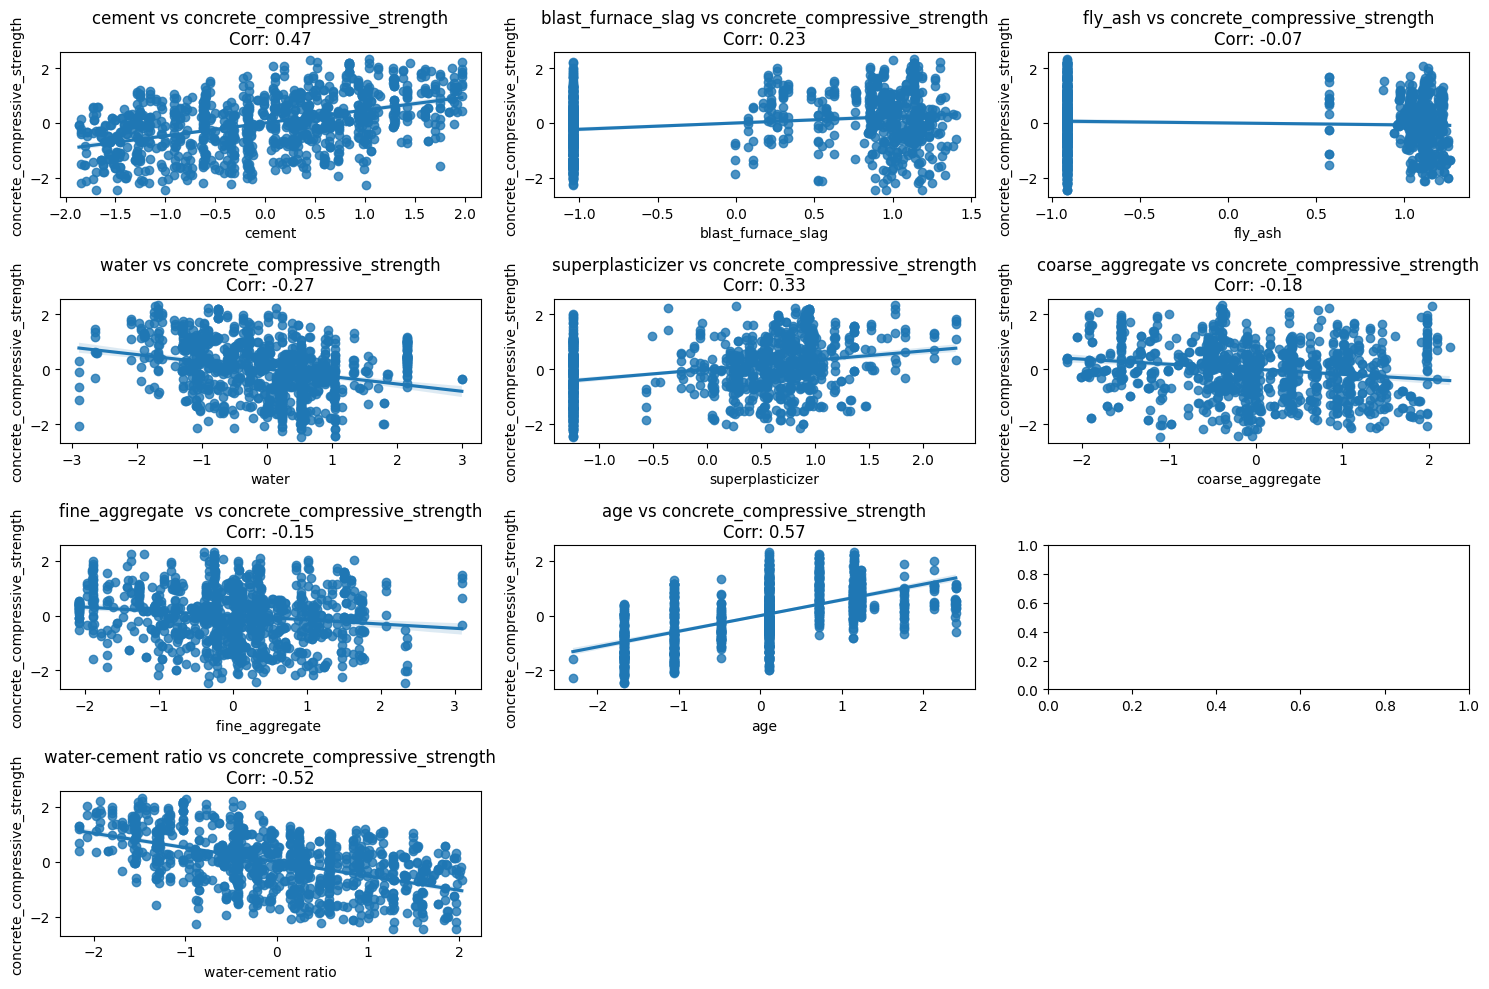

In [103]:
plot_regression_with_corr(df= df_yeo_johnson ,target_column ="concrete_compressive_strength" )

**FEATURE IMPORTANCE**

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X= df_yeo_johnson.drop('concrete_compressive_strength', axis=1)
y= df_yeo_johnson['concrete_compressive_strength']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

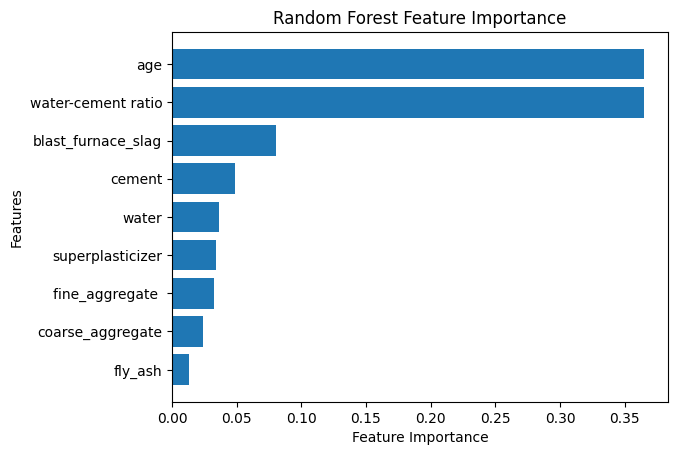

In [105]:
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
sorted_features= rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_features], rf.feature_importances_[sorted_features])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

In [108]:
!pip install eli5 --upgrade

In [130]:
#FEATURE IMPORTANCE
import eli5
from eli5.sklearn import PermutationImportance

In [131]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.gaussian_process import GaussianProcessRegressor

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [133]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

warnings.filterwarnings('ignore')


In [134]:

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2),round(mean_squared_error(y_test,yhat),2)

algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor(),DecisionTreeRegressor(),LinearRegression(),
     KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(ExtraTreeRegressor(), random_state=42),
     make_pipeline(StandardScaler(), Ridge(alpha=0.1, max_iter=100)), # Using pipeline for standardization
     GaussianProcessRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

 #Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE','MSE'])




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 759, number of used features: 9
[LightGBM] [Info] Start training from score 0.000123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Model  Score   MAE  RMSE   MSE
0  GradientBoostingRegressor  0.906  0.22  0.29  0.09
1              LGBMRegressor  0.915  0.19  0.28  0.08
2             XGBRFRegressor  0.848  0.28  0.37  0.14
3      DecisionTreeRegressor  0.818  0.27  0.41  0.17
4           LinearRegression  0.815  0.32  0.41  0.17
5        KNeighborsRegressor  0.855  0.27  0.37  0.13
6      RandomForestRegressor  0.895  0.22  0.31  0.10
7           BaggingRegressor  0.896  0.22  0.31  0.10
8                   Pipeline  0.815  0.32  0.41  0.17
9   GaussianProcessRegressor  0.620  0.35  0.59  0.35

In [135]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=42)
regr = LGBMRegressor(n_estimators=1000, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8,learning_rate=.1,reg_lambda=0.2)
#best_model
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test);y_pred

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)


print("MSE:",mse)
print("RMSE:",rmse)
print("r2_score",round(r2_score(y_test, y_pred), 4)*100)

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 759, number of used features: 9
[LightGBM] [Info] Start training from score 0.019924
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [136]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [137]:
dtr.score(X_train, y_train)

0.9963140176473512

In [138]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator = dtr)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

In [139]:
ada.score(X_train, y_train)

0.9754428574981983

In [140]:
ada.score(X_test, y_test)

0.8814569324893481

In [141]:
# hyper parameter tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_estimators' : [40, 50, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'loss' : ['linear','square', 'exponential']
}

grid_search = GridSearchCV(ada, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [40, 50, 80, 100]},
             verbose=1)

In [142]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 50}
0.8995962113949826


In [143]:
import xgboost as xg
from sklearn.model_selection import cross_val_score

In [144]:
xg = XGBRegressor(random_state = 1)
cv = cross_val_score(xg,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)

In [145]:
import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


def clf_performance(model, model_name):
    """
    Evaluates and prints the performance metrics of a classification model.

    Args:
        model: The trained classification model.
        model_name (str): The name of the model.
    """
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2 Score: {r2:.4f}")


xg = XGBRegressor(random_state = 1)
param_grid = {
#               'nthread':[4],
#               'objective':['reg:linear'],
#               'learning_rate': [0.3],
              'max_depth': [4],
#               'min_child_weight': [1],
#               'subsample': [1],
#               'colsample_bytree': np.arange(0.5,1,0.1),
              'n_estimators': [500]
              }
clf_xgb = GridSearchCV(xg, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error', n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGBoost') # Calling the defined function

XGBoost Performance:
  MAE: 0.1614
  MSE: 0.0556
  RMSE: 0.2358
  R2 Score: 0.9398


In [125]:
import eli5
from eli5.sklearn import PermutationImportance
import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Assuming X_train, y_train, X_test, y_test are defined and available

# Define and train the XGBoost model
xg = xg.XGBRegressor(random_state=1)
xg.fit(X_train, y_train) # Fit the model before using it in PermutationImportance

# Now you can use the trained model in PermutationImportance
perm = PermutationImportance(xg).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist(), top=len(X_test.columns))

In [146]:
#save model to disk
import pickle
filename= 'finalized_model.sav'
pickle.dump(xg, open(filename, 'wb'))

scaler= "scalar.pkl"
pickle.dump(scaler, open(scaler, 'wb'))

In [148]:
pickled_model = pickle.load(open('finalized_model.sav', 'rb'))
pickled_scalar=pickle.load(open('scalar.pkl', 'rb'))

In [149]:
pickled_scalar.fit_transform([cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age])

AttributeError: 'str' object has no attribute 'fit_transform'

In [150]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [151]:
import streamlit as st

In [152]:
def predict(cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age):

     #Predicting the price of the carat
     scaler_list=scaler.fit_transform([[cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age]]).tolist()

     prediction = pickled_model.predict(pd.DataFrame(scaler_list,columns=["cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer",
                                                                          "coarse_aggregate", "fine_aggregate", "age"]))
     return prediction

In [153]:
st.title('Compressive Strength Concrete Predictor')
st.image("""https://civildigital.com/wp-content/uploads/2016/07/Hydraulic-Compression-Testing-Machine.jpg""")
st.header('Enter the Components of Concrete')

2024-12-18 17:16:21.612 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:21.929 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-18 17:16:21.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:21.948 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:21.953 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:21.954 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:21.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:21.961 Thread 'MainThread': mi

DeltaGenerator()

In [154]:
cement = st.number_input('cement:', min_value=0.1, max_value=10.0, value=1.0)

blast_furnace_slag = st.number_input('blast_furnace_slag:', min_value=0.1, max_value=100.0, value=1.0)

fly_ash = st.number_input('fly_ash:', min_value=0.1, max_value=100.0, value=1.0)

water = st.number_input('water:', min_value=0.1, max_value=100.0, value=1.0)

superplasticizer = st.number_input('superplasticizer:', min_value=0.1, max_value=100.0, value=1.0)

coarse_aggregate = st.number_input('Coarse_aggregates:', min_value=0.1, max_value=100.0, value=1.0)

fine_aggregate = st.number_input('Fine_aggregates:', min_value=0.1, max_value=100.0, value=1.0)

age = st.slider('Age in years:', min_value=0.5, max_value=150.0, value=1.0)

2024-12-18 17:16:58.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:58.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:58.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:58.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:58.133 Session state does not function when running a script without `streamlit run`
2024-12-18 17:16:58.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:58.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16:58.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:16

In [155]:
if st.button('Componets of Concrete'):
     price = predict(cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate, age )
     st.success(f'The predicted compressive strength of concrete is ${concrete_compressive_strength:.2f} USD')

2024-12-18 17:18:11.941 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:18:11.955 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:18:11.957 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:18:11.963 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 17:18:11.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [156]:
#running
!pip install streamlit pyngrok


In [159]:
!pip install streamlit pyngrok

import streamlit as st
from pyngrok import ngrok
import os

# **Get your authtoken from ngrok.com/dashboard after signing up/logging in.**
NGROK_AUTH_TOKEN = "2qOnQXQIw8IgIryBrvkVkan4lnd_3knS1pJJu649HmejzrQ5X"  # Replace with your actual authtoken
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

os.system("streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py &") #updated this line
# Get the public URL
public_url = ngrok.connect(8501)
print("Streamlit app is running at:", public_url)

Streamlit app is running at: NgrokTunnel: "https://0e66-34-48-174-209.ngrok-free.app" -> "http://localhost:8501"
